In [24]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #limit so the numbers we see just like sql limit 1000
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '😍',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)






HTTPSConnectionPool(host='pro-api.coinmarketcap.com', port=443): Max retries exceeded with url: /v1/cryptocurrency/listings/latest?start=1&limit=15&convert=USD (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x144b40b90>: Failed to resolve 'pro-api.coinmarketcap.com' ([Errno 8] nodename nor servname provided, or not known)"))


In [26]:
#better structure raw data from website
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12497,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19962021.00000,19962021.00000,False,1781933672026.98999,NaN,1,NaN,NaN,None,2025-12-14T13:10:00.000Z,89266.19564,65946721180.72775,-18.99160,-0.02559,-1.23284,-0.16688,-6.22480,-20.00757,-22.20717,1781933672026.98999,58.53380,1874590108514.89990,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
1,1027,Ethereum,ETH,ethereum,11265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695118.01624,120695118.01624,True,372805365039.00000,NaN,2,NaN,NaN,None,2025-12-14T13:10:00.000Z,3088.81893,10850323122.34148,-48.06110,0.29357,-0.78693,1.41680,-1.19039,-24.25776,-31.67765,372805365038.99622,12.24610,372805365039.00000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
2,825,Tether USDt,USDT,tether,162132,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186251181379.22647,188858806824.26126,True,188896578636.07999,NaN,3,NaN,NaN,None,2025-12-14T13:10:00.000Z,1.00020,47527726411.13783,-35.66490,-0.00081,0.00045,-0.05294,0.08718,-0.05050,-0.01019,186288431665.26089,6.11930,188896578636.07999,None,2025-12-14T13:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-14 13:59:22.258631
3,1839,BNB,BNB,bnb,3004,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137735511.28000,137735511.28000,137735511.28000,False,122664590145.57001,NaN,4,NaN,NaN,None,2025-12-14T13:10:00.000Z,890.58072,1514779614.15785,-9.78220,0.28559,-0.17208,-0.20668,-1.47285,-23.95467,-3.12376,122664590145.57133,4.02930,122664590145.57001,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
4,52,XRP,XRP,xrp,1767,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,200026540932.64999,NaN,5,NaN,NaN,None,2025-12-14T13:10:00.000Z,2.00055,1285247179.92083,-52.45700,0.00923,-1.64379,-2.20316,-12.16303,-19.72401,-33.05932,120696479038.70033,3.96470,200055043070.72000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
5,3408,USDC,USDC,usd-coin,35465,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,78413311801.90594,78413311801.90594,False,78408382002.86000,NaN,6,60901219650.23000,60897390826.17167,None,2025-12-14T13:10:00.000Z,0.99994,4493882434.33410,-48.74320,-0.00499,-0.00046,-0.01349,0.01131,0.00692,0.00956,78408382002.85684,2.57560,78408382002.86000,None,2025-12-14T13:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-14 13:59:22.258631
6,5426,Solana,SOL,solana,1061,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,561900139.27908,616036291.17034,True,80797285080.09000,NaN,7,525236893.30000,68888335980.85349,None,2025-12-14T13:10:00.000Z,131.15670,2188340147.12134,-45.07060,0.00467,-1.47289,-1.27233,-5.43402,-35.08928,-44.12131,73696966218.70061,2.42080,80797285080.09000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
7,1958,TRON,TRX,tron,1268,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94683904849.42979,94

In [ ]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'LOL',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df = pd.concat([df, df2], ignore_index=True)
    df['timestamp']=pd.to_datetime('now')

    file_path = '/Users/pc/Documents/mypytest/INDEX.csv'

    if not os.path.isfile(file_path):
        df.to_csv(file_path, header=True)
    else:
        df.to_csv(file_path, mode='a', header=False)

    print("File updated:", file_path)



In [20]:


for i in range(10):
    api_runner()
    print('API Runner completed sucessfully')

    sleep(60) #sleep for 1 minute

File updated: /Users/pc/Documents/mypytest/INDEX.csv
API Runner completed sucessfully
File updated: /Users/pc/Documents/mypytest/INDEX.csv
API Runner completed sucessfully


KeyboardInterrupt: 

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12497,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19962021.00000,19962021.00000,False,1781933672026.98999,NaN,1,NaN,NaN,None,2025-12-14T13:10:00.000Z,89266.19564,65946721180.72775,-18.99160,-0.02559,-1.23284,-0.16688,-6.22480,-20.00757,-22.20717,1781933672026.98999,58.53380,1874590108514.89990,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
1,1027,Ethereum,ETH,ethereum,11265,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695118.01624,120695118.01624,True,372805365039.00000,NaN,2,NaN,NaN,None,2025-12-14T13:10:00.000Z,3088.81893,10850323122.34148,-48.06110,0.29357,-0.78693,1.41680,-1.19039,-24.25776,-31.67765,372805365038.99622,12.24610,372805365039.00000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
2,825,Tether USDt,USDT,tether,162132,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186251181379.22647,188858806824.26126,True,188896578636.07999,NaN,3,NaN,NaN,None,2025-12-14T13:10:00.000Z,1.00020,47527726411.13783,-35.66490,-0.00081,0.00045,-0.05294,0.08718,-0.05050,-0.01019,186288431665.26089,6.11930,188896578636.07999,None,2025-12-14T13:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-12-14 13:59:22.258631
3,1839,BNB,BNB,bnb,3004,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137735511.28000,137735511.28000,137735511.28000,False,122664590145.57001,NaN,4,NaN,NaN,None,2025-12-14T13:10:00.000Z,890.58072,1514779614.15785,-9.78220,0.28559,-0.17208,-0.20668,-1.47285,-23.95467,-3.12376,122664590145.57133,4.02930,122664590145.57001,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
4,52,XRP,XRP,xrp,1767,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,200026540932.64999,NaN,5,NaN,NaN,None,2025-12-14T13:10:00.000Z,2.00055,1285247179.92083,-52.45700,0.00923,-1.64379,-2.20316,-12.16303,-19.72401,-33.05932,120696479038.70033,3.96470,200055043070.72000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
5,3408,USDC,USDC,usd-coin,35465,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,78413311801.90594,78413311801.90594,False,78408382002.86000,NaN,6,60901219650.23000,60897390826.17167,None,2025-12-14T13:10:00.000Z,0.99994,4493882434.33410,-48.74320,-0.00499,-0.00046,-0.01349,0.01131,0.00692,0.00956,78408382002.85684,2.57560,78408382002.86000,None,2025-12-14T13:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-12-14 13:59:22.258631
6,5426,Solana,SOL,solana,1061,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,561900139.27908,616036291.17034,True,80797285080.09000,NaN,7,525236893.30000,68888335980.85349,None,2025-12-14T13:10:00.000Z,131.15670,2188340147.12134,-45.07060,0.00467,-1.47289,-1.27233,-5.43402,-35.08928,-44.12131,73696966218.70061,2.42080,80797285080.09000,None,2025-12-14T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-12-14 13:59:22.258631
7,1958,TRON,TRX,tron,1268,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94683904849.42979,94

In [70]:
# DATA FOCUS AND SEGREGATIION PHASE
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

df3 = df2.stack()
df4=df3.to_frame(name='values')
df5 = df4.reset_index()

df5


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02559
1,Bitcoin,quote.USD.percent_change_24h,-1.23284
2,Bitcoin,quote.USD.percent_change_7d,-0.16688
3,Bitcoin,quote.USD.percent_change_30d,-6.22480
4,Bitcoin,quote.USD.percent_change_60d,-20.00757
5,Bitcoin,quote.USD.percent_change_90d,-22.20717
6,Ethereum,quote.USD.percent_change_1h,0.29357
7,Ethereum,quote.USD.percent_change_24h,-0.78693
8,Ethereum,quote.USD.percent_change_7d,1.41680
9,Ethereum,quote.USD.percent_change_30d,-1.19039


In [71]:
df6 = df5.rename(columns={'level_1': 'percentage_change'})

df6

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02559
1,Bitcoin,quote.USD.percent_change_24h,-1.23284
2,Bitcoin,quote.USD.percent_change_7d,-0.16688
3,Bitcoin,quote.USD.percent_change_30d,-6.22480
4,Bitcoin,quote.USD.percent_change_60d,-20.00757
5,Bitcoin,quote.USD.percent_change_90d,-22.20717
6,Ethereum,quote.USD.percent_change_1h,0.29357
7,Ethereum,quote.USD.percent_change_24h,-0.78693
8,Ethereum,quote.USD.percent_change_7d,1.41680
9,Ethereum,quote.USD.percent_change_30d,-1.19039


In [83]:
df7 = df6

df7

#note # inplace = true only when working on actual variable

,name,percentage_change,values
0,Bitcoin,1h,-0.02559
1,Bitcoin,24h,-1.23284
2,Bitcoin,7d,-0.16688
3,Bitcoin,30d,-6.22480
4,Bitcoin,60d,-20.00757
5,Bitcoin,90d,-22.20717
6,Ethereum,1h,0.29357
7,Ethereum,24h,-0.78693
8,Ethereum,7d,1.41680
9,Ethereum,30d,-1.19039


In [85]:
df7['percentage_change'].replace(
    ['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
     'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
     'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
    ['1h','24h','7d','30d','60d','90d'],
   inplace = True 
)

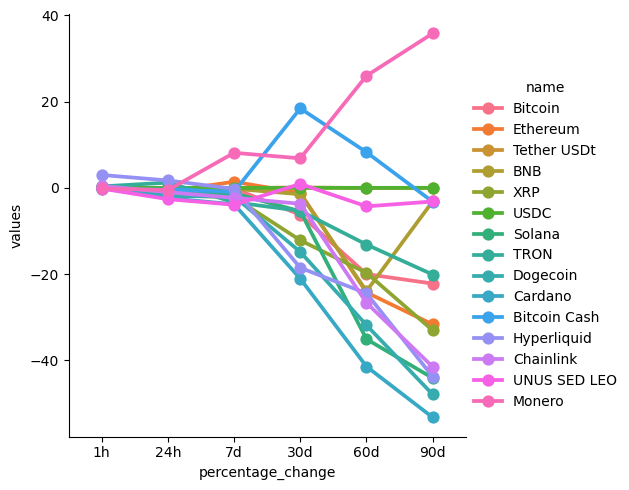

In [86]:
sns.catplot(x='percentage_change', y='values', hue='name', data=df7, kind='point')

In [97]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: title={'center': 'Coin Market Analysis'}, xlabel='Percentage Change', ylabel='Values'>

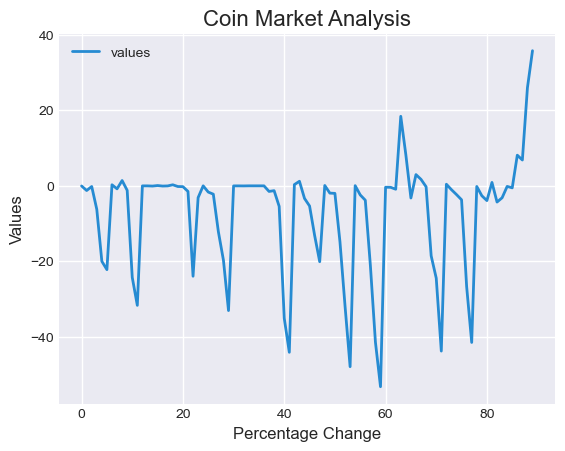

In [104]:
df7.plot(kind = 'line', title = 'Coin Market Analysis', xlabel = 'Percentage Change', ylabel = 'Values')